# California Hausing Prices

## Podbranie danych

In [1]:
import os
import tarfile
import urllib

In [2]:
HOUSING_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
HOUSING_PATH = "housing"
HOUSING_TGZ = "housing.tgz"

In [3]:
if not os.path.isdir(HOUSING_PATH):
    os.makedirs(HOUSING_PATH) # utworzenie katalogu z danymi i wynikami
housing_tgz_path = os.path.join(HOUSING_PATH, HOUSING_TGZ)
urllib.request.urlretrieve(HOUSING_URL, housing_tgz_path) # pobranie pliku i zapisanie.
housing_tar_file = tarfile.open(housing_tgz_path)
housing_tar_file.extractall(path=HOUSING_PATH)


## Wczytanie danych

In [4]:
import pandas as pd

In [5]:
def load_housing_data(housing_path=HOUSING_PATH):
    housing_csv= os.path.join(housing_path, 'housing.csv')
    housing_dataframe = pd.read_csv(housing_csv)
    return housing_dataframe

In [6]:
housing_dataframe = load_housing_data()

## Informacje o danych

In [7]:
housing_dataframe.head() # wyswietlenie pierwszych pieciu wierszy

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing_dataframe.info() # pokazanie informacji o kolumnach

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing_dataframe["ocean_proximity"].value_counts() # zliczenie elementow w poszczegolnych grupach 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing_dataframe.describe() # ignoruje wartosci zerowe "total_bedrooms"

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Histogram danych

In [11]:
import matplotlib.pyplot as plt

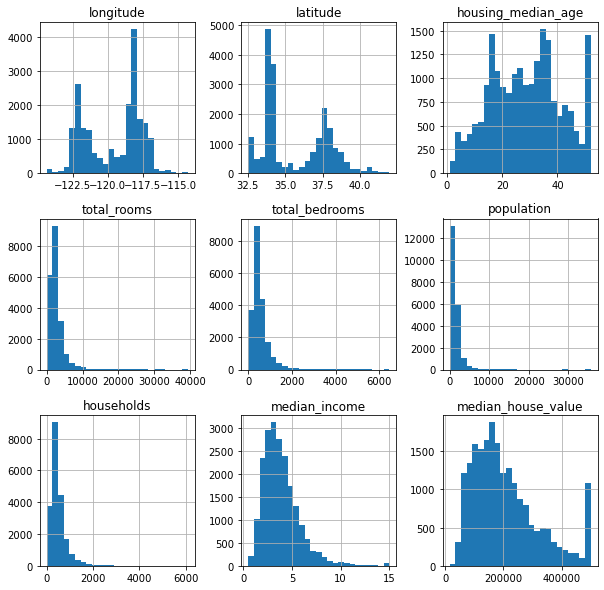

In [12]:
%matplotlib inline
housing_dataframe.hist(bins=25, figsize=(10,10))
plt.show()

## Podział danych na testowe i trenigowe

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

In [17]:
housing_dataframe_train, housing_dataframe_test = train_test_split(housing_dataframe, test_size=0.2, random_state=42)

In [18]:
housing_dataframe_train.size, housing_dataframe_train.size

(165120, 165120)

## Utworzenie atrybutu wyodrebniajacego grupy

In [19]:
housing_dataframe["income_cat"] = np.ceil(housing_dataframe["median_income"]/1.5)

In [20]:
housing_dataframe["income_cat"].value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: income_cat, dtype: int64

In [21]:
housing_dataframe["income_cat"].where(housing_dataframe["income_cat"] < 5, 5.0, inplace=True)

In [22]:
housing_dataframe["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

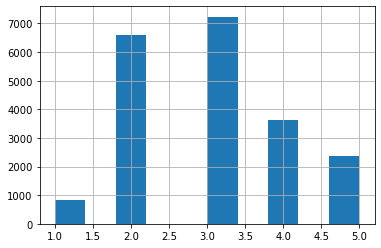

In [23]:
housing_dataframe["income_cat"].hist()
plt.show()

## Próbkowanie wartswowe ze wzgledu na utworzony parametr

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

In [26]:
spliter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# from train_index, test_index in spliter.split(housing_dataframe, housing_dataframe["income_cat"]):
#     strat_train_set = housing.loc[train_index]
#     strat_test_set = housing.loc[test_index]
for train_index, test_index in spliter.split(housing_dataframe, housing_dataframe["income_cat"]):
    strat_train_dataframe = housing_dataframe.loc[train_index]
    strat_test_dataframe = housing_dataframe.loc[test_index]


In [27]:
housing_dataframe["income_cat"].value_counts()/len(housing_dataframe)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [28]:
strat_test_dataframe["income_cat"].value_counts()/len(strat_test_dataframe)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [29]:
for set_ in (strat_train_dataframe, strat_test_dataframe):
    set_.drop("income_cat", axis=1, inplace=True)

In [30]:
strat_train_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


## Wizualizacja danych

In [31]:
housing = strat_train_dataframe.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

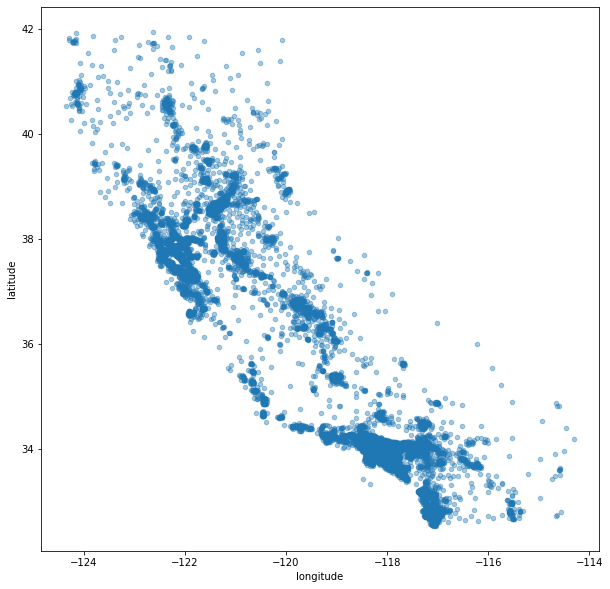

In [33]:
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,10),alpha=0.4)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

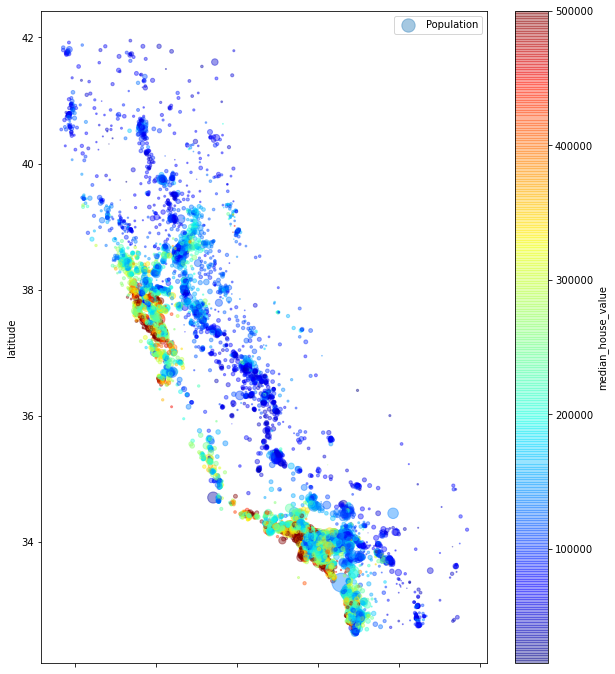

In [49]:
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,12),alpha=0.4,
            s=housing["population"]/100, label="Population",
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            sharex=True)

## Korleacja liniowa

In [35]:
corr_matrix = housing.corr()

In [38]:
corr_matrix["median_house_value"].sort_values(ascending=False)
# wspolczniki korelacji mieszcza sie pomiedzy -1 a 1
# warrtosci bliske 1 oznaczaja korelacje dodatnia wraz ze wzrostem mediany cen mieszakn rosnie mediana dochodw
# warotsci ujemne znacza cos przeciwnego

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

## Korelacja liniowa z uzyciem PANDAS

In [44]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

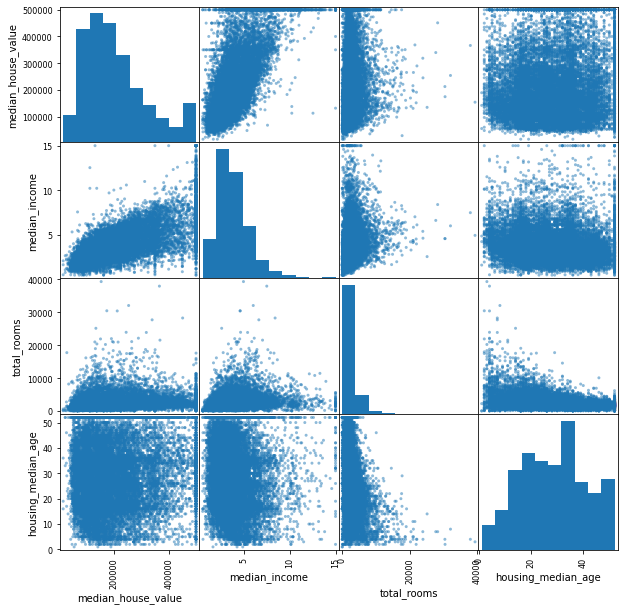

In [54]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(10,10))


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

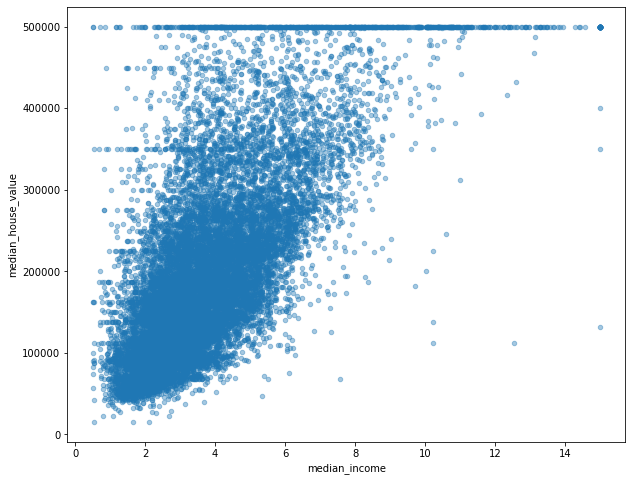

In [56]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.4,figsize=(10,8))

## Kombinacja atrybutów

In [64]:
housing["rooms_per_households"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_rooms"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_households"] = housing["population"]/housing["households"]
# mozemy z dostepnych atrybutow stowrzyc inne, ktre lepeiej pokaza nam zaleznosci

## Nowa korleacja liniowa

In [65]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.687160
rooms_by_households         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_by_households   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_by_rooms          -0.259984
Name: median_house_value, dtype: float64

## Przygotweanie danych pod algorytm uczenia maszynowego

In [69]:
housing = strat_train_dataframe.drop("median_house_value", axis=1) # kopiuje dane bez kolumny "median house value"
housing_labels = strat_train_dataframe["median_house_value"].copy() # tworze osobno dane z usunieta kolumna

## Czyszczenie danych

In [94]:
# housing.dropna(subset=["total_bedrooms"]) # usuwa wiersze ktre maja puste pola w kolumnie total_bedrooms
# housing.drop("total_bedrooms", axis=1) # usuwam cala kolumne
# median = housing["total_bedrooms"].median() licze mediane dla total bedrroms
# housing["total_bedrooms"].fillna(median, inplace=True) # zastepuje puste wartosci mediana

In [98]:
from sklearn.impute import SimpleImputer

In [101]:
imputer = SimpleImputer(strategy="median") # pozwoli nam wyliczyc mediane dla kazdej kolumny,
# kolumnny musza zawierac wartosci numerycze
housing_num = housing.drop("ocean_proximity", axis=1) # pozbywam sie jednej kolumny, zawierajacej teksty

In [203]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [102]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [106]:
imputer.statistics_ # wartosci mediany dla kazdej kolumny

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [108]:
housing_num.median().values # porwnianie tego co podaje DataFrame

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [119]:
X = imputer.transform(housing_num) # zastepuje brakujace dane wartosciami obiczonymi przez imputer
housing_tr = pd.DataFrame(X, columns=housing_num.columns)# X to tylko array, wiec towrzymy z neigo DataFrame
# fit i transform mozna zastopic uzwyajac jednej metody fit_trnasform moze byc ona optymalnijesza niz obie osobno

## Zakodowanie wartosci teksotwych jako numerycznych

In [120]:
from sklearn.preprocessing import LabelEncoder

In [121]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [130]:
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"] # biore tylko kolumne z wartosciami tekstowymi
housing_cat_econded = encoder.fit_transform(housing_cat) # wyuczam encoder i transformuje dane
housing_cat_econded, housing_cat_econded.size

(array([0, 0, 4, ..., 1, 0, 3]), 16512)

In [128]:
encoder.classes_ # klasy danych

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

## Uzycie OneHotEncoder

In [156]:
from sklearn.preprocessing import OneHotEncoder

In [157]:
encoder = OneHotEncoder() # tworzymy kodowanie goracojedynkowe wektor zerojedynkowy
# o dlugosci ilosci klas wystepujacych w kolumnie "ocean_proximity"
housing_cat_1hot = encoder.fit_transform(housing_cat_econded.reshape(-1,1))
housing_cat_1hot # Spare matrix SciPy zawi

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [158]:
housing_cat_1hot.toarray() # konwertuje na array numpy

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

## Uzycie LabelBinarizer

In [159]:
#  Zastapienie LabelBinarizer i OneHotEncoder  przy uzyciu LabelBinarizer
from sklearn.preprocessing import LabelBinarizer

In [162]:
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat) # sparse_output+True mamy macierz rzadka
housing_cat_1hot # Odrazu mamy array numpy

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [168]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [169]:
housing["ocean_proximity"].values

array(['<1H OCEAN', '<1H OCEAN', 'NEAR OCEAN', ..., 'INLAND', '<1H OCEAN',
       'NEAR BAY'], dtype=object)

## Niestandardowe trnasformaty- Kombinacja atrybutow

In [217]:
from sklearn.base import BaseEstimator, TransformerMixin

In [218]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

In [220]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

## Potok

In [213]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [227]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # zwraca mi array
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

In [228]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [229]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])